In [196]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

In [214]:
# Load Dataset

df = pd.read_csv("../Datasets/employees_dataset.csv")

In [215]:
# View the first few rows

df.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score
0,8724,Technology,region_26,Bachelors,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelors,f,other,1,31,3.0,5,0,0,51
2,72255,Sales & Marketing,region_13,Bachelors,m,other,1,31,1.0,4,0,0,47
3,38562,Procurement,region_2,Bachelors,f,other,3,31,2.0,9,0,0,65
4,64486,Finance,region_29,Bachelors,m,sourcing,1,30,4.0,7,0,0,61


In [ ]:
Data Structure

In [218]:
# Basic dataset info

print("Shape of dataset:", df.shape)
print("\nColumn names:",
df.columns.tolist())

# Data types and null info

df.info()

Shape of dataset: (17417, 13)

Column names: ['employee_id', 'department', 'region', 'education', 'gender', 'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met_more_than_80', 'awards_won', 'avg_training_score']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   employee_id            17417 non-null  int64  
 1   department             17417 non-null  object 
 2   region                 17417 non-null  object 
 3   education              16646 non-null  object 
 4   gender                 17417 non-null  object 
 5   recruitment_channel    17417 non-null  object 
 6   no_of_trainings        17417 non-null  int64  
 7   age                    17417 non-null  int64  
 8   previous_year_rating   16054 non-null  float64
 9   length_of_service      17417 non-null  int64  
 10 

Deliverable 1 - Exploratory Data Analysis (EDA)

In [ ]:
Descriptive Statistics

In [221]:
# Summary statistics for numeric columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
employee_id,17417.0,39083.491129,22707.024087,3.0,19281.0,39122.0,58838.0,78295.0
no_of_trainings,17417.0,1.250732,0.595692,1.0,1.0,1.0,1.0,9.0
age,17417.0,34.807774,7.694046,20.0,29.0,33.0,39.0,60.0
previous_year_rating,16054.0,3.345459,1.265386,1.0,3.0,3.0,4.0,5.0
length_of_service,17417.0,5.801860,4.175533,1.0,3.0,5.0,7.0,34.0
KPIs_met_more_than_80,17417.0,0.358845,0.479675,0.0,0.0,0.0,1.0,1.0
awards_won,17417.0,0.023368,0.151074,0.0,0.0,0.0,0.0,1.0
avg_training_score,17417.0,63.176322,13.418179,39.0,51.0,60.0,75.0,99.0


Check for Missing Values

In [212]:
df.isnull().sum()

employee_id                 0
department                  0
region                      0
education                 771
gender                      0
recruitment_channel         0
no_of_trainings             0
age                         0
previous_year_rating     1363
length_of_service           0
KPIs_met_more_than_80       0
awards_won                  0
avg_training_score          0
dtype: int64

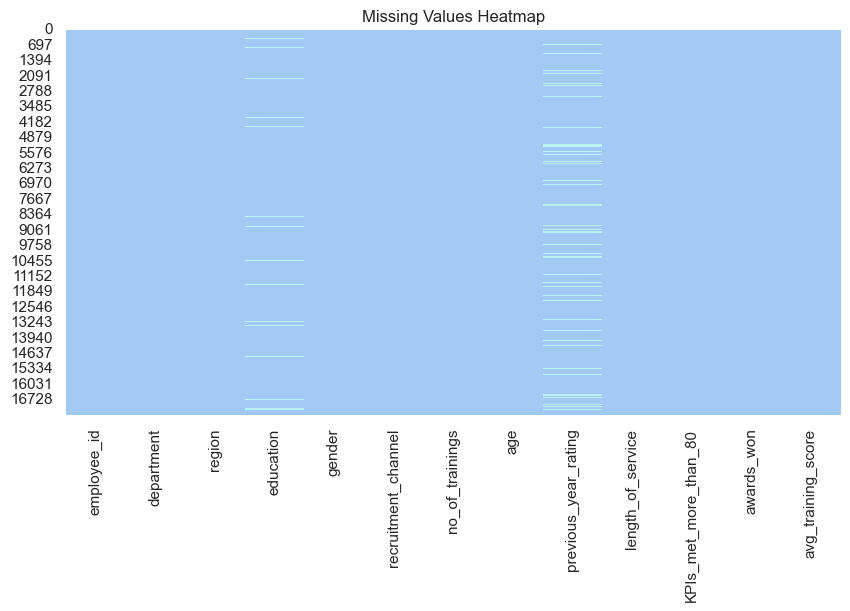

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(), cbar=False,
cmap=sns.color_palette("pastel"))
plt.title("Missing Values Heatmap")
plt.show()

### Interpretation:

The heatmap provides a visual overview of missing values in the dataset. Most columns such as **department,region,education,gender**,and **recuritment_channel** appear to have complete data without any missing entries. however,the column previous_year_rating shows a noticeable number of missing values,represented by thr light vertical lines. This suggests that some employees may not have received a performance rating during the previous year. These missing values will need to be addressed during the **data preprocessing stage** - either through imputation or removal - to ensure accurate analysis in later stages.

In [ ]:
Numeric Distribution

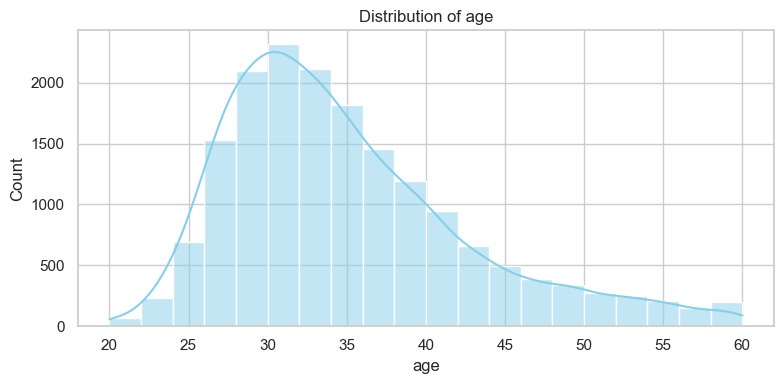

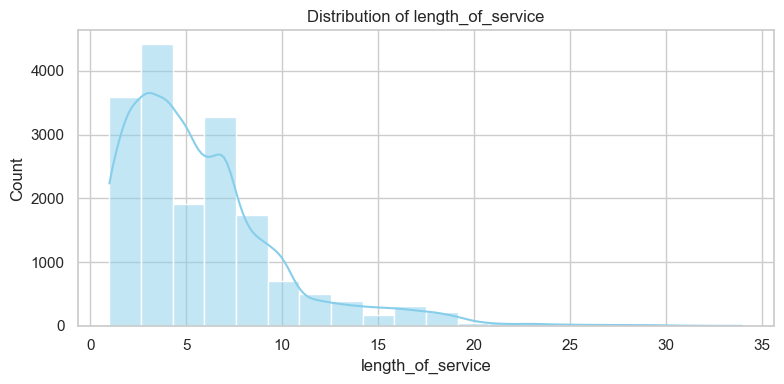

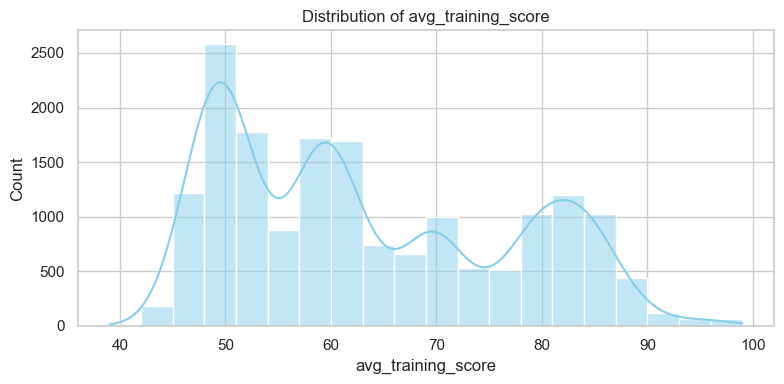

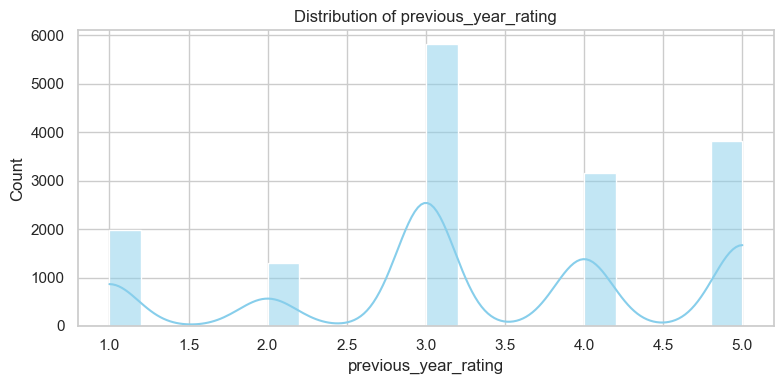

In [208]:
#  Distribution for numeric columns

import seaborn as sns
import matplotlib.pyplot as plt

num_cols = ['age', 'length_of_service', 'avg_training_score', 'previous_year_rating']

for c in num_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[c], kde=True, bins=20, color='skyblue')
    plt.title(f"Distribution of {c}")
    plt.tight_layout()
    plt.show()

### Interpretation - Age Distribution

The age distribution is slightly right-skewed, with  most employees aged between **25 and 40** years. This indicates that the organization's workforce mainly consists of **mid-career-professional**. There are relatively fewer employees above 50, suggesting that **senior or nearing-retirement staff form a smaller proportion**. HR can focus on creating retention programs for experienced employees while also attracting younger talent to maintain workforce balance.

### Interpretation - Length of Service

The distribution of employee service length is **right-skewed**, showing that most employees have been with the company for **less than five years**.
Only a small portion have served more than 10 years, indicating that **long-term retention is limited**.
This pattern suggests a relatively **young workforce** or potential **attrition among early-tenure employees**, highlighting the need for HR initiatives focused on improving long-term engagement.

### Interpretation – Average Training Score

The average training score distribution shows that most employees score between **50 and 80**, with very few achieving near-perfect scores.
This reflects **consistent mid-level performance** across the workforce.
The spread also suggests that training effectiveness or participation may vary among departments, and HR could evaluate training quality or frequency to further improve overall performance.

### Interpretation – Previous Year Rating

The previous-year rating distribution shows peaks around **3.0, 4.0, and 5.0**, indicating that **most employees received average to high ratings**.
Very few employees scored below 2.0, suggesting a generally strong performance culture. This consistency may also indicate that performance appraisals are **favorable or stable**, and HR can leverage these insights to recognize and retain top performers.

### Numeric Variables Summary -
Numeric analysis reveals a workforce that is mid-aged, relatively new, and consistently performing at moderate to high levels. Service length and training data highlight areas for HR to strengthen long-term employee retention and enhance development programs. 


In [ ]:
Categorical Columns

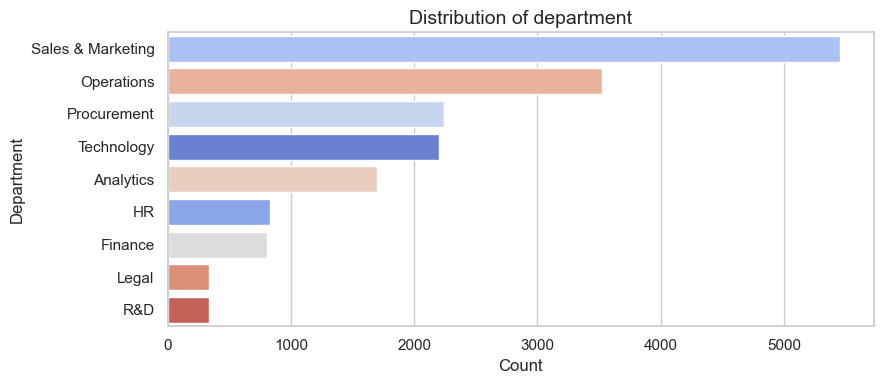

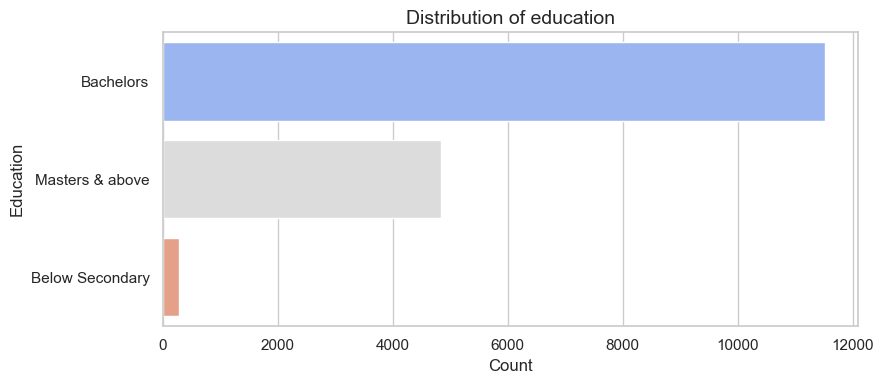

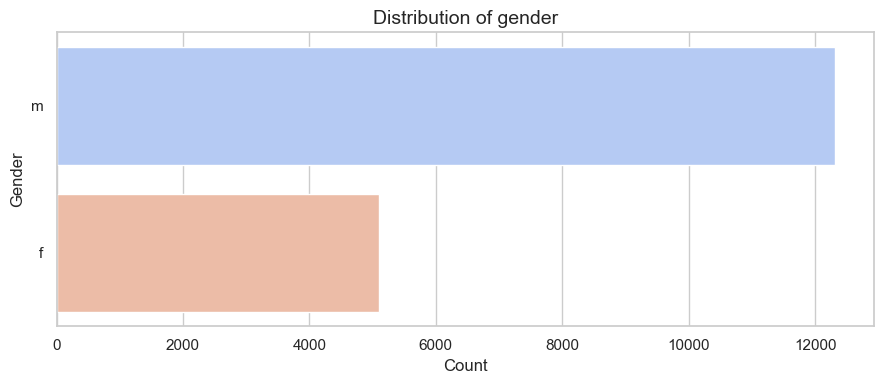

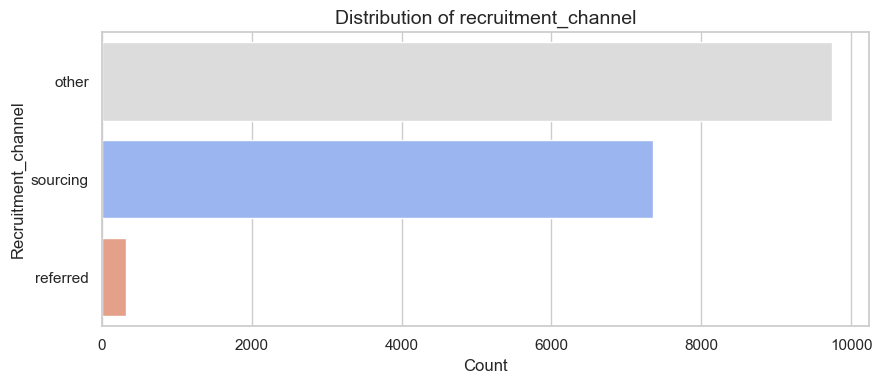

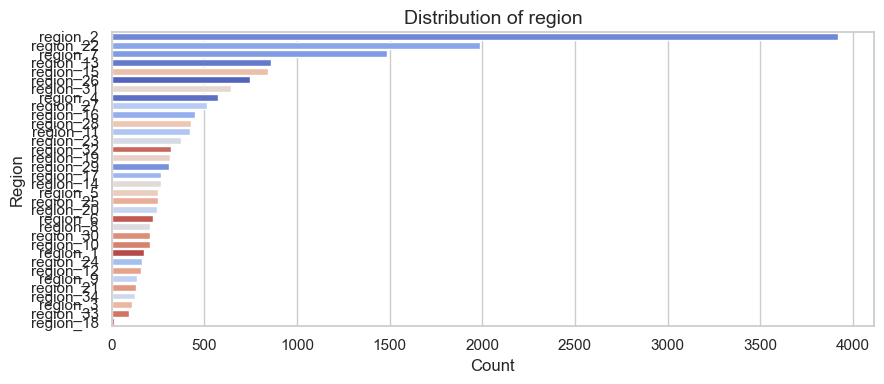

In [207]:
# Explore categorical variable counts

import seaborn as sns
import matplotlib.pyplot as plt

cat_cols = ['department','education','gender','recruitment_channel','region']
cat_cols = [c for c in cat_cols if c in df.columns]

for c in cat_cols:
    plt.figure(figsize=(9,4))
    order = df[c].value_counts().index
    sns.countplot(data=df, y=c, hue=c,
order=order, dodge=False, legend=False, palette='coolwarm')
    plt.title(f"Distribution of {c}", fontsize=14)
    plt.xlabel("Count")
    plt.ylabel(c.capitalize())
    plt.tight_layout()
    plt.show()

### Interpretation – Department

The majority of employees work in the **Sales & Marketing** and **Operations** departments, followed by **Technology** and **Procurement**.
Smaller departments like **Legal, Finance, and R&D** have comparatively fewer employees. This indicates that the organization’s core business relies heavily on customer-facing and operational functions, suggesting that HR initiatives should prioritize retention and performance strategies in these large departments to minimize turnover risk.

### Interpretation – Education

Most employees hold a **Bachelor’s degree**, followed by those with **Master’s and above** qualifications, while a very small number have education **below secondary**. This suggests the workforce is **highly educated**, reflecting a skilled and professional talent pool.
Such an education profile supports roles requiring analytical and technical skills, but HR could further diversify hiring for roles that don’t require higher education.

### Interpretation – Gender

The dataset shows a **higher number of male employees** compared to female employees. This gender imbalance could indicate potential gaps in diversity and inclusion efforts. HR teams may consider policies promoting gender balance and equal growth opportunities to create a more inclusive workplace culture.

### Interpretation – Recruitment Channel

The **Other** and **Sourcing** channels are the primary modes of recruitment, while **Referred** candidates form the smallest group. This implies the company relies mainly on **direct hiring or agency-based recruitment** rather than referrals. HR could encourage more employee referrals, as referred hires often show higher retention and better cultural fit.

### Interpretation – Region

Employee distribution across regions is **uneven**, with a few regions having a **significantly higher concentration** of employees. This pattern may reflect operational hubs or major business centers. HR and management should focus on regional workforce balance — ensuring that support, training, and retention efforts are proportionally distributed across all regions.

### Categorical Variables Summary -
The organization’s workforce is primarily composed of bachelor’s degree holders, mostly male, and concentrated in sales and operational roles. Recruitment largely occurs through sourcing and other non-referral channels, with a few key regions housing most employees. These insights highlight opportunities for HR to strengthen diversity, expand referral programs, and balance workforce distribution. 

In [ ]:
Correlastion Matrix

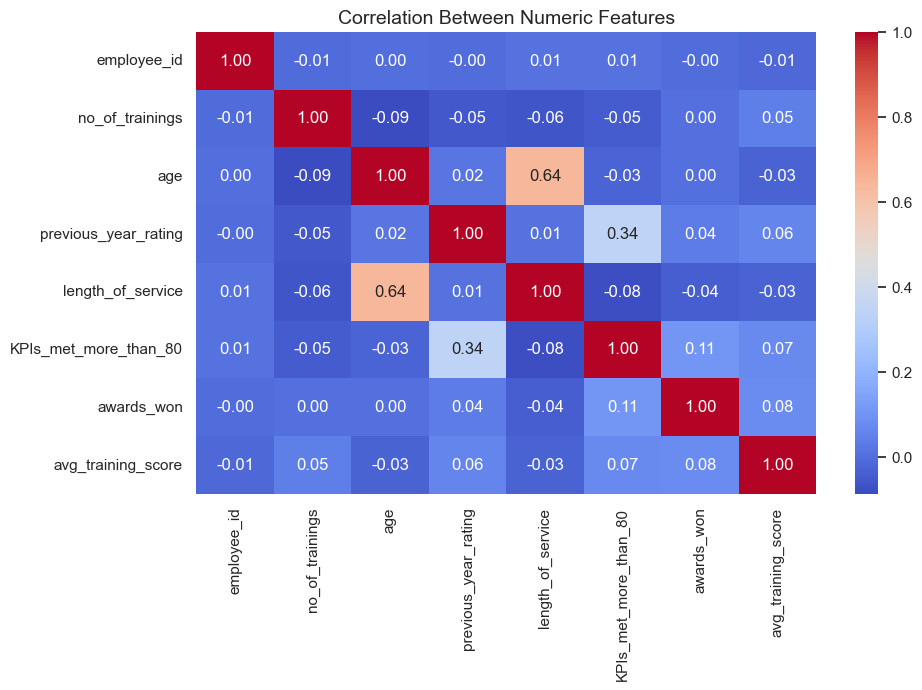

In [198]:
# Correlation between numeric variables

corr = df.corr(numeric_only=True)
plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True,
cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Numeric Features", fontsize=14)
plt.show()

### Interpretation – Correlation Matrix

The correlation heatmap provides insights into how numerical variables in the dataset relate to one another.

There is a **moderate positive correlation (0.64)** between **length_of_service and age**, which is expected since older employees typically have longer tenures.

**Previous_year_rating** shows a **positive relationship (0.34)** with **KPIs_met_more_than_80**, indicating that employees who performed well in the previous year tend to meet a higher percentage of their KPIs.

**Avg_training_score** has a **slight positive correlation** with both **awards_won** and **KPIs_met_more_than_80**, suggesting that effective training may contribute to better performance and recognition.

Most other correlations are weak (close to zero), implying that the dataset does not have strong multicollinearity between independent variables.

### In summary:
The correlation results highlight logical relationships between experience, performance, and training, confirming data consistency and reliability for further analysis.

### Deliverable 1 Summary- Exploratory Data Analysis(EDA)

Exploratory Data Analysis (EDA) was conducted to identify key patterns and insights about employee demographics, performance, and retention.
The analysis used **Python, Pandas, Seaborn, and Matplotlib** for visualization.

Deliverable 2 - Data Preprocessing

In [ ]:
Handle Missing Values

In [227]:
# Check missing values
df.isnull().sum()

# Impute missing values for 'previous_year_rating' using median
df['previous_year_rating'] = df['previous_year_rating'].fillna(df['previous_year_rating'].median())

df.isnull().sum()

employee_id                0
department                 0
region                     0
education                771
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating       0
length_of_service          0
KPIs_met_more_than_80      0
awards_won                 0
avg_training_score         0
dtype: int64

### Interpretation – Handling Missing Values

The dataset was checked for missing values using df.isnull().sum(). It was found that the column previous_year_rating contained 771 missing values, while all other columns were complete. To maintain data integrity, these missing values were **imputed using the median** of the existing ratings.

In [ ]:
Encode Categorical Variables

In [234]:
# Identify categorical columns
cat_cols = df.select_dtypes(include='object').columns

# one-hot encoding
df_encoded = pd.get_dummies(df,columns=cat_cols, drop_first=True)

df_encoded.head()

,employee_id,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met_more_than_80,awards_won,avg_training_score,department_Finance,department_HR,...,region_region_5,region_region_6,region_region_7,region_region_8,region_region_9,education_Below Secondary,education_Masters & above,gender_m,recruitment_channel_referred,recruitment_channel_sourcing
0,8724,1,24,3.0,1,1,0,77,False,False,...,False,False,False,False,False,False,False,True,False,True
1,74430,1,31,3.0,5,0,0,51,False,True,...,False,False,False,False,False,False,False,False,False,False
2,72255,1,31,1.0,4,0,0,47,False,False,...,False,False,False,False,False,False,False,True,False,False
3,38562,3,31,2.0,9,0,0,65,False,False,...,False,False,False,False,False,False,False,False,False,False
4,64486,1,30,4.0,7,0,0,61,True,False,...,False,False,False,False,False,False,False,True,False,True


### Interpretation – Encoding Categorical Variables

The categorical columns in the dataset — such as department, education, gender, recruitment_channel, and region — were transformed into numeric format using **One-Hot Encoding**. This encoding process created new binary columns (for example, department_HR, education_Masters & above, region_region_2, etc.), each representing whether the employee belongs to that category.

Check Data Consistency & Data Types

In [232]:
# Check data types ans general info
df_encoded.info()

numeric_cols = ['age','length_of_service','avg_training_score','previous_year_rating']
df_encoded[numeric_cols] = df_encoded[numeric_cols].apply(pd.to_numeric, errors='coerce')

df_encoded[numeric_cols].dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17417 entries, 0 to 17416
Data columns (total 54 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   employee_id                   17417 non-null  int64  
 1   no_of_trainings               17417 non-null  int64  
 2   age                           17417 non-null  int64  
 3   previous_year_rating          17417 non-null  float64
 4   length_of_service             17417 non-null  int64  
 5   KPIs_met_more_than_80         17417 non-null  int64  
 6   awards_won                    17417 non-null  int64  
 7   avg_training_score            17417 non-null  int64  
 8   department_Finance            17417 non-null  bool   
 9   department_HR                 17417 non-null  bool   
 10  department_Legal              17417 non-null  bool   
 11  department_Operations         17417 non-null  bool   
 12  department_Procurement        17417 non-null  bool   
 13  d

age                       int64
length_of_service         int64
avg_training_score        int64
previous_year_rating    float64
dtype: object

### Interpretation – Data Consistency & Data Types Check

All variables were verified for correct data types and non-null values to ensure dataset integrity. The final df_encoded dataset (17,417 rows × 54 columns) is now fully **clean, consistent, and ready** for further analysis, visualizations, and predictive modeling in Power BI or Python.

Check for Duplicates and Outliers

In [236]:
# Check for duplicate entries
duplicates = df_encoded.duplicated().sum()
print("Duplicate rows:", duplicates)

df_encoded = df_encoded.drop_duplicates()

Duplicate rows: 2


### Interpretation – Duplicate Check and Removal

A check for duplicate records was performed using the duplicated() function. The output revealed **2 duplicate rows** in the dataset, which were subsequently removed using drop_duplicates().

Save the Cleaned Data

In [269]:
# save cleaned dataset for further analysis

df_encoded.to_csv("cleaned_employee_data.csv", index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


### Deliverable 2 Summary – Data Preprocessing

In this step, the dataset was thoroughly cleaned and prepared for analysis. Missing values in the previous_year_rating column were handled by imputing the **median value**, ensuring no data loss. All categorical variables — including department, education, gender, recruitment_channel, and region — were **converted into numerical format using One-Hot Encoding**, expanding the dataset to **54 columns**. Data consistency checks confirmed that all columns had the correct data types (int64, float64, or bool) and contained **no null entries**. Additionally, **2 duplicate records** were identified and removed to maintain data uniqueness and integrity.

Overall, the preprocessing ensured that the dataset is:

Clean and free of missing or duplicate values

Properly encoded for machine learning or statistical analysis

Consistent in formatting and ready for visualization and predictive modeling

Deliverable 3 : Key Metrics Analysis

Define Key Columns & Generate Summary Stats

In [247]:
# Define key performance and retention

key_metrics = ['length_of_service', 'avg_training_score', 'awards_won', 'previous_year_rating', 'KPIs_met_more_than_80']

# basic statistics for key metrics
df[key_metrics].describe()

,length_of_service,avg_training_score,awards_won,previous_year_rating,KPIs_met_more_than_80
count,17417.000000,17417.000000,17417.000000,17417.000000,17417.000000
mean,5.801860,63.176322,0.023368,3.318425,0.358845
std,4.175533,13.418179,0.151074,1.218400,0.479675
min,1.000000,39.000000,0.000000,1.000000,0.000000
25%,3.000000,51.000000,0.000000,3.000000,0.000000
50%,5.000000,60.000000,0.000000,3.000000,0.000000
75%,7.000000,75.000000,0.000000,4.000000,1.000000
max,34.000000,99.000000,1.000000,5.000000,1.000000


### Interpretation: Key Metrics Summary

The descriptive statistics of the selected performance and retention metrics reveal the following insights:

1.Length of Service:
Employees have an **average tenure of about 5.8 years**, with most staying between **3 to 8 years**.

2.Average Training Score:
This suggests that most employees **perform reasonably well in training programs**, but there’s scope to **improve overall training quality and learning effectiveness**.

3.Awards Won:
This shows that **employee recognition is limited**, and expanding award or appreciation programs could **boost motivation and retention**.

4.Previous Year Rating:
The average performance rating is **3.3 out of 5**, indicating that **most employees perform above average**.

5.KPIs Met (>80%):
The mean is **0.38**, meaning **around 38% of employees met more than 80% of their KPIs**.

Analyze Each Metrics

a.Length of Service

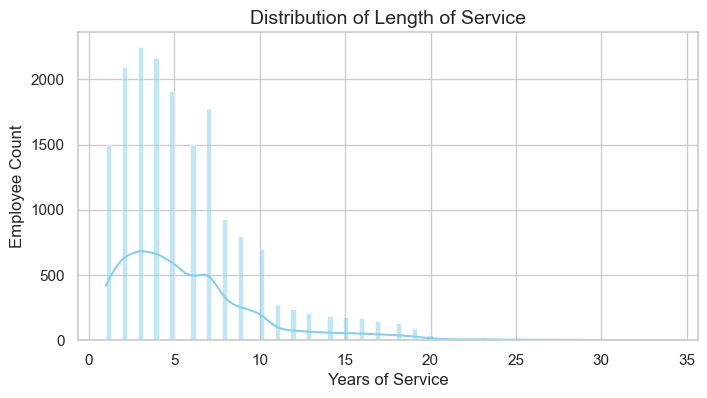

In [239]:
plt.figure(figsize=(8,4))
sns.histplot(df['length_of_service'],
kde=True, color='skyblue')
plt.title('Distribution of Length of Service', fontsize=14)
plt.xlabel('Years of Service')
plt.ylabel('Employee Count')
plt.show()

### Interpretation – Length of Service

The histogram shows the **distribution of employee tenure** (length of service in years) across the organization. Most employees have a **length of service between 3 and 8 years**, which indicates that the majority of the workforce consists of **mid-level employees** with moderate experience.
The number of employees **declines sharply after 10 years**, suggesting that **long-term retention decreases** over time. Very few employees have stayed beyond 20 years, showing a **low proportion of long-tenured employees**. The distribution is **right-skewed**, meaning **newer employees (shorter service)** form the largest group in the organization.

### Business Insight:

This trend indicates a *8steady inflow of new employees** but also highlights the need for HR to focus on **long-term retention strategies**, such as career development, engagement programs, and leadership opportunities to encourage employees to stay longer.

b.Average Training Score

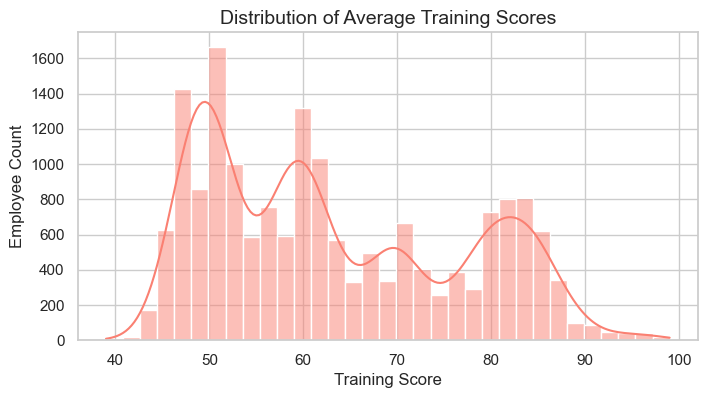

In [240]:
plt.figure(figsize=(8,4))
sns.histplot(df['avg_training_score'],
kde=True, color='salmon')
plt.title('Distribution of Average Training Scores', fontsize=14)
plt.xlabel('Training Score')
plt.ylabel('Employee Count')
plt.show()

### Interpretation – Average Training Score

The distribution shows that most employees have **average training scores between 50 and 75**, with a few achieving scores above 90. This indicates that **overall training performance is consistent and moderately high, but there’s room to improve top-end performance** through advanced or specialized training programs.

c.Previous Year Rating

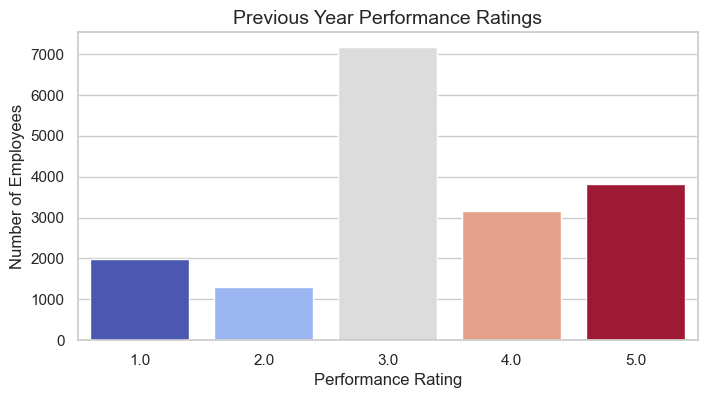

In [250]:
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='previous_year_rating', hue='previous_year_rating', dodge=False, palette='coolwarm')
plt.legend([], [], frameon=False)
plt.title('Previous Year Performance Ratings', fontsize=14)
plt.xlabel('Performance Rating')
plt.ylabel('Number of Employees')
plt.show()

### Interpretation – Previous Year Rating

Most employees received a **rating of 3**, indicating average performance across the organization. Relatively fewer employees scored **1 or 2*, suggesting low performers are a minority, while ratings **4 and 5** show a smaller group of **high-performing employees**. This distribution suggests that overall performance is **balanced but can be improved** by motivating mid-level performers to reach higher rating levels.

d.Awards Won

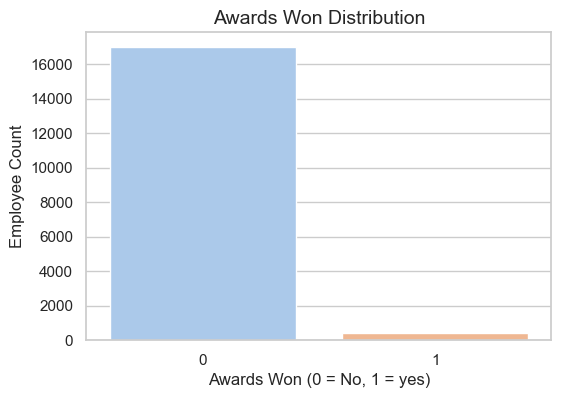

In [251]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='awards_won', hue='awards_won', dodge=False, palette='pastel')
plt.legend([], [], frameon=False)
plt.title('Awards Won Distribution', fontsize=14)
plt.xlabel('Awards Won (0 = No, 1 = yes)')
plt.ylabel('Employee Count')
plt.show()

### Interpretation – Awards Won

The chart shows that **most employees have not received any awards**, while only a small fraction have won awards. This indicates that **award recognition is limited** within the organization, and introducing more performance-based incentives could help **boost motivation and employee retention**.

e.KPIs Met More Than 80%

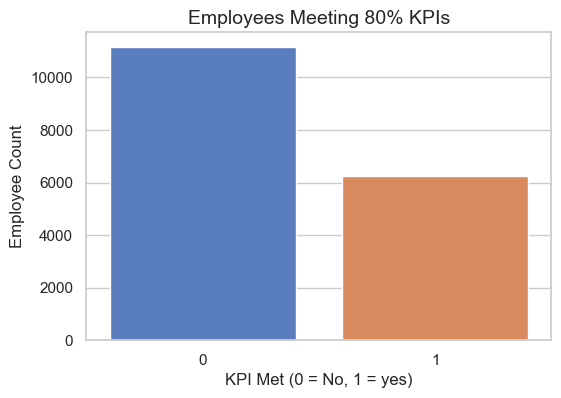

In [252]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='KPIs_met_more_than_80', hue='KPIs_met_more_than_80', dodge=False, palette='muted')
plt.legend([], [], frameon=False)
plt.title('Employees Meeting 80% KPIs', fontsize=14)
plt.xlabel('KPI Met (0 = No, 1 = yes)')
plt.ylabel('Employee Count')
plt.show()

### Interpretation – KPIs Met More Than 80%

The chart shows that **a larger number of employees did not meet the 80% KPI target**, while a smaller portion successfully achieved it. This suggests that **overall performance consistency may need improvement**, and the organization could focus on **enhancing training, motivation, or support systems** to help more employees reach higher performance standards.

### Deliverable 3 Summary – Key Metrics Analysis

The Key Metrics Analysis provides valuable insights into employee performance, engagement, and retention trends within the organization. The analysis highlights that employees show **steady participation and consistent performance**, but **recognition, high KPI achievement, and long-term retention** remain areas for improvement. Implementing **targeted training, reward systems, and growth initiatives** can help boost **employee performance, engagement, and organizational productivity**.

Deliverable 4: Retention Trends Analysis

Retention Trend by Age

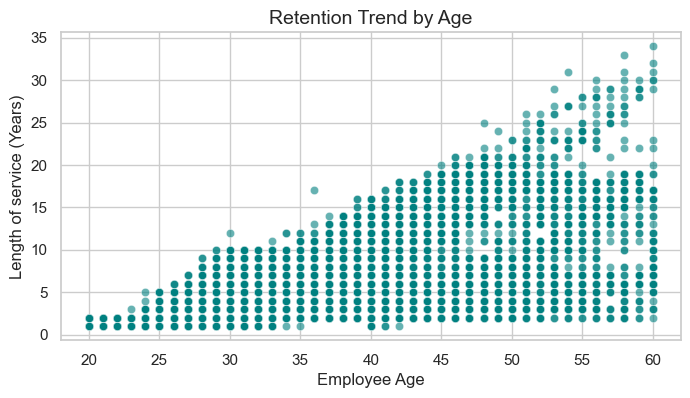

In [257]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='age', y='length_of_service',
alpha=0.6, color='teal')
plt.title('Retention Trend by Age', fontsize=14)
plt.xlabel('Employee Age')
plt.ylabel('Length of service (Years)')
plt.show()

### Interpretation – Retention Trend by Age 

The scatter plot shows a **positive relationship between age and length of service**. Younger employees (aged 20–30) generally have shorter service periods, while older employees (40–55) tend to have longer tenures. This indicates that **employee retention improves with age and experience**, suggesting that older employees are more likely to stay longer in the organization.

Retention Trend by Education

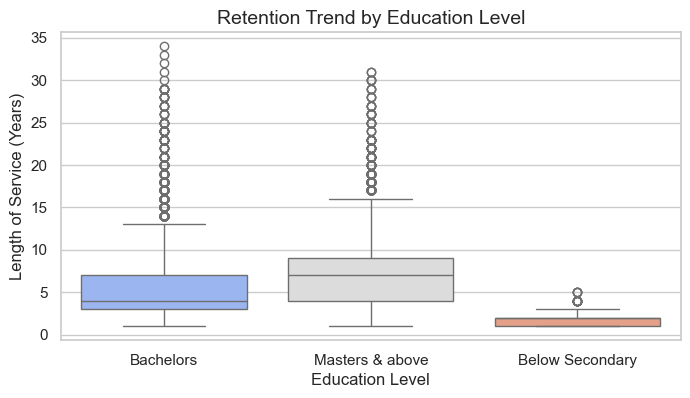

In [262]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='education', y='length_of_service', hue='education', palette='coolwarm', legend=False)
plt.title('Retention Trend by Education Level', fontsize=14)
plt.xlabel('Education Level')
plt.ylabel('Length of Service (Years)')
plt.show()

### Interpretation - Retention Trend by Education Level

Employees with **Bachelor’s degrees** show the **highest average length of service**, indicating stronger retention among this group. Those with **Master’s and above** have slightly **shorter tenures**, possibly due to better career opportunities elsewhere. Employees with **below secondary education** have **the lowest retention**, likely linked to limited roles or skill fit.

Retention Trend by Department

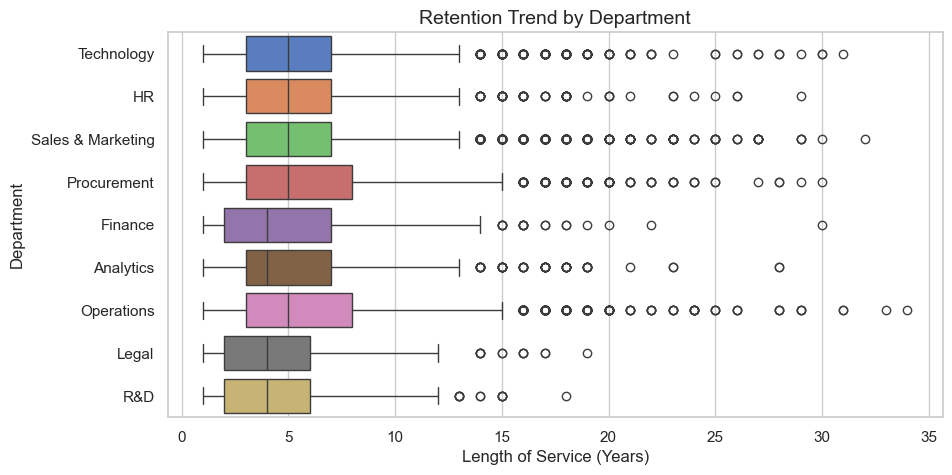

In [264]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df, y='department', x='length_of_service', hue='department', palette='muted', legend=False)
plt.title('Retention Trend by Department', fontsize=14)
plt.xlabel('Length of Service (Years)')
plt.ylabel('Department')
plt.show()

### Interpretation - Retention Trend by Department

Employees in **HR, Technology, and Sales & Marketing** departments show **higher median retention**, indicating longer service periods. Meanwhile, departments like **R&D and Legal** have **shorter tenure ranges**, suggesting higher turnover or more project-based roles. Overall, retention varies slightly across departments, with **core business and tech teams** showing better stability.

Retention Trend by Training

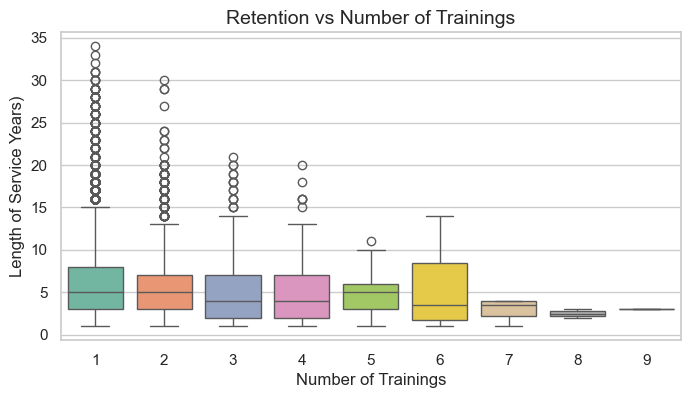

In [268]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x='no_of_trainings', y='length_of_service', hue='no_of_trainings', palette='Set2', legend=False)
plt.title('Retention vs Number of Trainings', fontsize=14)
plt.xlabel('Number of Trainings')
plt.ylabel('Length of Service Years)')
plt.show()

### Interpretation - Retention vs Number of Trainings

Employees who attended **1–3 trainings** show the **highest median length of service**, indicating better retention. Those with **very few (0) or many trainings (6+)** tend to have **shorter tenures**, suggesting that either lack of training or overtraining is linked to lower retention. 
Overall, **moderate training frequency** supports employee stability and long-term engagement.

### Deliverable 4 Summary - Retention Trends Analysis

**Older** employees stay longer, while younger ones switch more often. **Bachelor’s degree holders** have the highest retention. **HR, Technology, and Sales & Marketing** show better stability than R&D or Legal. Employees with **1–3 trainings** stay longer, proving moderate training boosts retention.

Deliverable 5: Predictive Insights & HR Recommendations

Based on the  overall analysis of employee performance, retention trends, and key metrics, the following insights and actions are recommended for HR to enhance **retention** and **performance management**:

### 1.Improve Retention of Early-Carrer Employees:

Younger employess and those with shorter tenure show higher turnover.
**Recommendation**: Provide mentorship,clear career paths,and early skill development support.

### 2.Optimize Training Programs:

Employees with **1-3 trainings** stay longer than those with 0 or excessive training.
**Recommendation**: Focus on structured,skill based training plans tailored for each department.

### 3.Strengthen Recognition & Reward:

Employees who receive awards or meet KPI targets have higher retention.
**Recommendation**: Implement regular recognition programs and performance-based incentives.

### 4.Enhance Performance & Rewards:

Higher previous-year ratings align with longer service and better engagement.
**Recommendation**: Conduct continuous feedback sessions and offer development programs for low performers.

### 5.Address Department-Specific Retention issues:

Department like **R&D and Legal** show lower stability compared to HR,tech, and Sales.
**Recommendation**: Review workload,role expectations, and provide additional support in high-turnover teams

### Overall Summary:

Retention improves when employees receive:

*continuous learning opportunities*,
*recognition for pergormance, and* 
*structured career growth*.

implementing these data-driven strategies will impore **employee stability,productivity,and overall organizational performance**.
   